# Importing all the libraries

In [161]:
import numpy as np
import pandas as pd
import datetime
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt, numpy as np
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import AgglomerativeClustering
from matplotlib.colors import ListedColormap
from sklearn import metrics
import warnings
import sys


# Data Cleaning and analysis

In [162]:
df = pd.read_csv('marketing_campaign.csv', delimiter='\t')

In [163]:
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


## Dataframe description
Content
Attributes
People
1. ID: Customer's unique identifier
2. Year_Birth: Customer's birth year
3. Education: Customer's education level
4. Marital_Status: Customer's marital status
5. Income: Customer's yearly household income
6. Kidhome: Number of children in customer's household
7. Teenhome: Number of teenagers in customer's household
8. Dt_Customer: Date of customer's enrollment with the company
9. Recency: Number of days since customer's last purchase
10. Complain: 1 if the customer complained in the last 2 years, 0 otherwise

Products
1. MntWines: Amount spent on wine in last 2 years
2. MntFruits: Amount spent on fruits in last 2 years
3. MntMeatProducts: Amount spent on meat in last 2 years
4. MntFishProducts: Amount spent on fish in last 2 years
5. MntSweetProducts: Amount spent on sweets in last 2 years
6. MntGoldProds: Amount spent on gold in last 2 years

Promotion
1. NumDealsPurchases: Number of purchases made with a discount
2. AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
3. AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
4. AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
5. AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
6. AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
7. Response: 1 if customer accepted the offer in the last campaign, 0 otherwise

Place
1. NumWebPurchases: Number of purchases made through the company’s website
2. NumCatalogPurchases: Number of purchases made using a catalogue
3. NumStorePurchases: Number of purchases made directly in stores
4. NumWebVisitsMonth: Number of visits to company’s website in the last month


In [164]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

### Checking the null values in the columns

In [165]:
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

### Checking the information of all the columns (null count and data type)

In [166]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

### Since there are very less numbers rows with null values we will drop them

In [167]:
df.dropna()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


In [168]:
## converting Dt_customer to datetime data type

df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'],format='%d-%m-%Y')
df['Dt_Customer'].describe()

count                             2240
mean     2013-07-10 10:01:42.857142784
min                2012-07-30 00:00:00
25%                2013-01-16 00:00:00
50%                2013-07-08 12:00:00
75%                2013-12-30 06:00:00
max                2014-06-29 00:00:00
Name: Dt_Customer, dtype: object

In [169]:
## checking the days the customer has been engaged with the business relative to the lates customer

df['customer_for'] = pd.to_numeric(df['Dt_Customer'].max() - df['Dt_Customer'],errors="coerce")
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,customer_for
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,0,0,0,0,0,0,3,11,1,57283200000000000
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,0,0,0,0,0,0,3,11,0,9763200000000000
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,0,0,0,0,0,3,11,0,26956800000000000
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,0,0,0,0,0,0,3,11,0,12009600000000000
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,0,0,0,0,0,3,11,0,13910400000000000


### Grouping by marital status

In [170]:
## Grouping by mariatal status

Marital_status_count = df.groupby('Marital_Status').size()
Marital_status_count

Marital_Status
Absurd        2
Alone         3
Divorced    232
Married     864
Single      480
Together    580
Widow        77
YOLO          2
dtype: int64

### Plotting the histogram for marital status

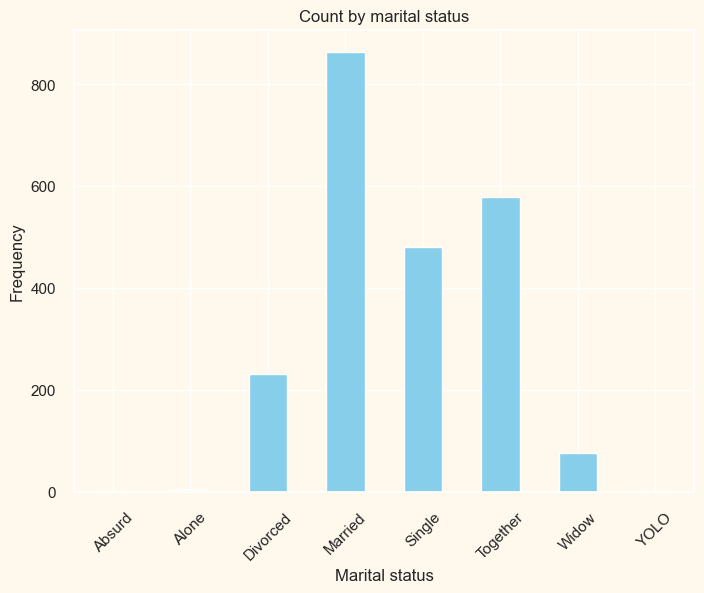

In [171]:
## plotting the same for 

plt.figure(figsize=(8, 6))
Marital_status_count.plot(kind='bar', color='skyblue')
plt.title('Count by marital status')
plt.xlabel('Marital status')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

### Grouping by education qualification

In [172]:
## grouping by education qualification

Education_count = df.groupby('Education').size()
Education_count

Education
2n Cycle       203
Basic           54
Graduation    1127
Master         370
PhD            486
dtype: int64

### Checking the income values such as mean, max, min std etc.

In [173]:
## to find the range within the income column

df['Income'].describe()

count      2216.000000
mean      52247.251354
std       25173.076661
min        1730.000000
25%       35303.000000
50%       51381.500000
75%       68522.000000
max      666666.000000
Name: Income, dtype: float64

In [174]:
## function to separate the records by income range

def define_income(df):
    for index, income in enumerate(df['Income']):
        if income < 36000:
            df.loc[index, 'income_range'] = '0-36000'
        elif income < 52000:
            df.loc[index, 'income_range'] = '36000-52000'
        elif income < 69000:
            df.loc[index, 'income_range'] = '52000-69000'
        else:
            df.loc[index, 'income_range'] = '69000+'

define_income(df)
        

In [175]:
## grouping by the income range

df.groupby('income_range').size()

income_range
0-36000        582
36000-52000    543
52000-69000    547
69000+         568
dtype: int64

### Feature enginering

In [176]:
## Total amount spent by each entries in the dataset

df['totalspent'] = df['MntWines'] + df['MntFruits'] +  df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']


## finding the age of each rows

from datetime import datetime

df['Age'] = datetime.now().year - df['Year_Birth']


## Evaluating the living situation whether they are living alone or with a partner 
##labeling alone as 0 and with partner as 1

df['Living_status'] = df.Marital_Status.replace({"Married":2, "Together":2
                                                 , "Absurd":1, 
                                                 "Widow":1, "YOLO":1, 
                                                 "Divorced":1, "Single":1, "Alone":1})


## total number of children in the household

df['total_child']=df['Kidhome']+df['Teenhome']


## total people in the household

df['family_size'] = df['Living_status'] + df['total_child']


## checking the person is a parent or not

df['is_parent'] = np.where(df.total_child > 0,1,0)

#Segmenting education levels in three groups labeling undergradueates as 0, graduates as 1 and post graduates as 2
df["Education"]=df["Education"].replace({"Basic":0,"2n Cycle":0,
                                             "Graduation":1, 
                                             "Master":2, "PhD":2})

#Dropping some of the redundant features
to_drop = ["Marital_Status", "Dt_Customer", "Z_CostContact", "Z_Revenue", "Year_Birth", "ID","income_range"]
df = df.drop(to_drop, axis=1)



/var/folders/9b/q0txn0fd5qj57z36hsjf2yxh0000gn/T/ipykernel_41488/2490795409.py:16: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Living_status'] = df.Marital_Status.replace({"Married":2, "Together":2
/var/folders/9b/q0txn0fd5qj57z36hsjf2yxh0000gn/T/ipykernel_41488/2490795409.py:37: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["Education"]=df["Education"].replace({"Basic":0,"2n Cycle":0,


In [177]:
df.head()

,Education,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,AcceptedCmp2,Complain,Response,customer_for,totalspent,Age,Living_status,total_child,family_size,is_parent
0,1,58138.0,0,0,58,635,88,546,172,88,...,0,0,1,57283200000000000,1617,67,1,0,1,0
1,1,46344.0,1,1,38,11,1,6,2,1,...,0,0,0,9763200000000000,27,70,1,2,3,1
2,1,71613.0,0,0,26,426,49,127,111,21,...,0,0,0,26956800000000000,776,59,2,0,2,0
3,1,26646.0,1,0,26,11,4,20,10,3,...,0,0,0,12009600000000000,53,40,2,1,3,1
4,2,58293.0,1,0,94,173,43,118,46,27,...,0,0,0,13910400000000000,422,43,2,1,3,1


In [178]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Education            2240 non-null   int64  
 1   Income               2216 non-null   float64
 2   Kidhome              2240 non-null   int64  
 3   Teenhome             2240 non-null   int64  
 4   Recency              2240 non-null   int64  
 5   MntWines             2240 non-null   int64  
 6   MntFruits            2240 non-null   int64  
 7   MntMeatProducts      2240 non-null   int64  
 8   MntFishProducts      2240 non-null   int64  
 9   MntSweetProducts     2240 non-null   int64  
 10  MntGoldProds         2240 non-null   int64  
 11  NumDealsPurchases    2240 non-null   int64  
 12  NumWebPurchases      2240 non-null   int64  
 13  NumCatalogPurchases  2240 non-null   int64  
 14  NumStorePurchases    2240 non-null   int64  
 15  NumWebVisitsMonth    2240 non-null   i

Reletive Plot Of Some Selected Features: A Data Subset


/Users/asheshlalshrestha/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/asheshlalshrestha/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/asheshlalshrestha/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/asheshlalshrestha/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: Fu

<Figure size 800x550 with 0 Axes>

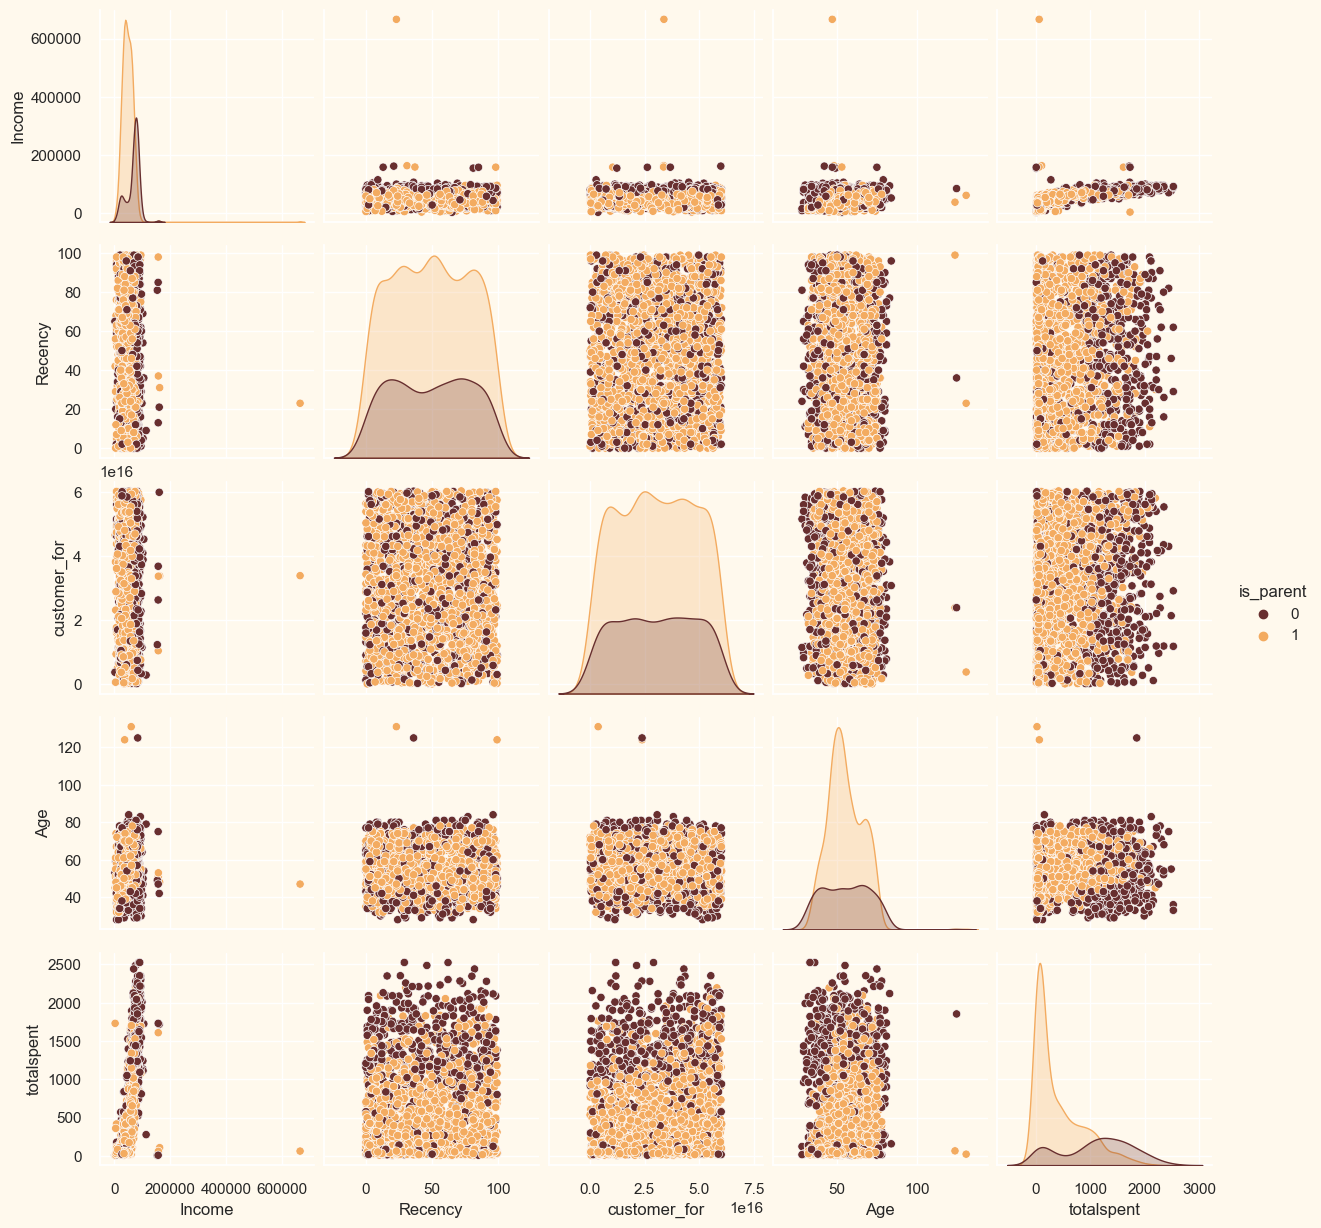

In [179]:
#To plot some selected features 
#Setting up colors prefrences
sns.set(rc={"axes.facecolor":"#FFF9ED","figure.facecolor":"#FFF9ED"})
pallet = ["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"]
cmap = colors.ListedColormap(["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"])
#Plotting following features
To_Plot = [ "Income", "Recency", "customer_for", "Age", "totalspent", "is_parent"]
print("Reletive Plot Of Some Selected Features: A Data Subset")
plt.figure()
sns.pairplot(df[To_Plot], hue= "is_parent",palette= (["#682F2F","#F3AB60"]))
#Taking hue 
plt.show()

### From the sns plot above we can clearly see that there are outliers in the age and income column

In [180]:
#Dropping the outliers by setting a cap on Age and income. 

df = df[(df["Age"]<90)]
df = df[(df["Income"]<67000)]
print("The total number of data-points after removing the outliers are:", len(df))

The total number of data-points after removing the outliers are: 1614


Reletive Plot Of Some Selected Features: A Data Subset


/Users/asheshlalshrestha/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/asheshlalshrestha/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/asheshlalshrestha/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/asheshlalshrestha/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: Fu

<Figure size 800x550 with 0 Axes>

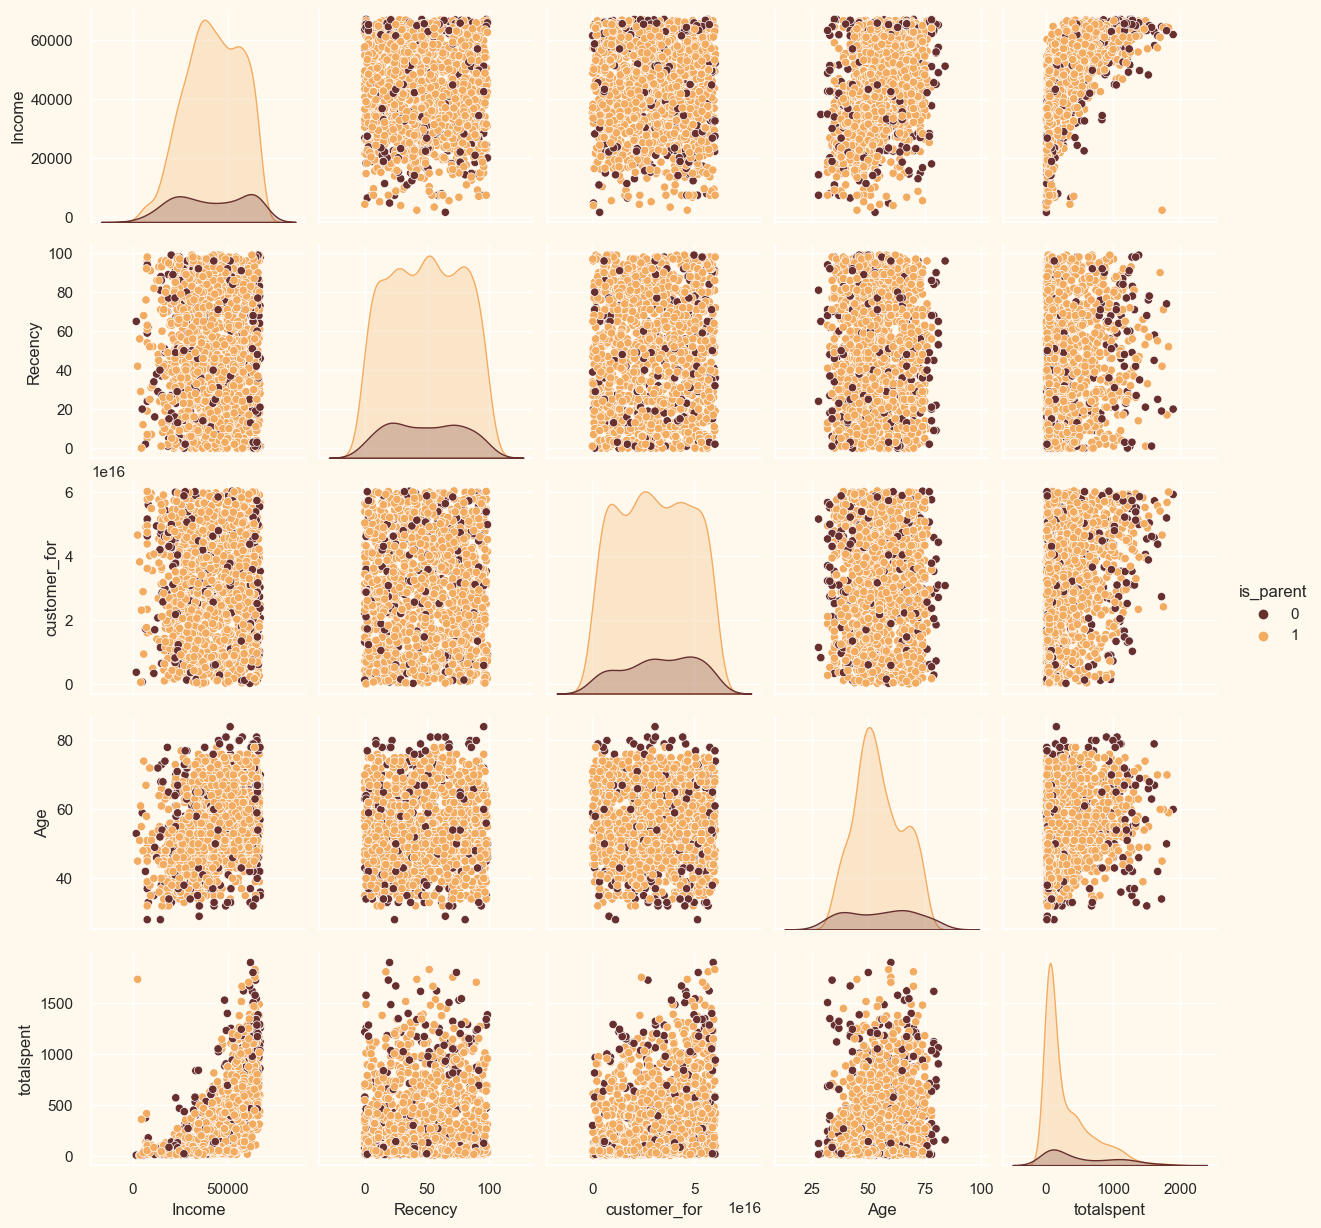

In [181]:
To_Plot = [ "Income", "Recency", "customer_for", "Age", "totalspent", "is_parent"]
print("Reletive Plot Of Some Selected Features: A Data Subset")
plt.figure()
sns.pairplot(df[To_Plot], hue= "is_parent",palette= (["#682F2F","#F3AB60"]))
#Taking hue 
plt.show()

In [183]:
corrmat

,Education,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,AcceptedCmp2,Complain,Response,customer_for,totalspent,Age,Living_status,total_child,family_size,is_parent
Education,1.000000,0.233359,-0.026694,0.176450,-0.023018,0.195641,-0.131911,0.031999,-0.124178,-0.148162,...,0.014443,-0.030157,0.075425,-0.085564,0.096685,0.238931,-0.025199,0.117663,0.081230,0.088634
Income,0.233359,1.000000,-0.392005,0.433558,0.009344,0.662480,0.356584,0.484878,0.345011,0.348711,...,0.086324,-0.013430,-0.005354,-0.000012,0.687535,0.342146,0.010051,0.030804,0.030571,0.027399
Kidhome,-0.026694,-0.392005,1.000000,-0.196727,0.008524,-0.459098,-0.309295,-0.335742,-0.295710,-0.298928,...,-0.074250,0.024203,0.020314,-0.098509,-0.497857,-0.283187,0.019942,0.636613,0.526846,0.435386
Teenhome,0.176450,0.433558,-0.196727,1.000000,0.012144,0.269941,-0.039750,0.000357,-0.081693,-0.019303,...,0.023628,0.002163,-0.066178,0.000911,0.174787,0.471939,0.023996,0.630874,0.524463,0.437570
Recency,-0.023018,0.009344,0.008524,0.012144,1.000000,0.007865,-0.006262,0.018650,0.002990,0.054467,...,-0.000148,-0.003077,-0.217533,0.008878,0.014979,0.012951,0.019630,0.016297,0.024174,0.002563
MntWines,0.195641,0.662480,-0.459098,0.269941,0.007865,1.000000,0.271438,0.499712,0.261562,0.280269,...,0.229241,-0.026187,0.114396,0.226274,0.901163,0.253170,-0.022428,-0.150983,-0.134843,-0.071865
MntFruits,-0.131911,0.356584,-0.309295,-0.039750,-0.006262,0.271438,1.000000,0.568843,0.646120,0.553976,...,-0.015708,0.012938,0.055108,0.168863,0.550271,0.021502,-0.042411,-0.276026,-0.247305,-0.261905
MntMeatProducts,0.031999,0.484878,-0.335742,0.000357,0.018650,0.499712,0.568843,1.000000,0.569245,0.516476,...,0.015865,-0.013373,0.098545,0.211736,0.781220,0.108095,-0.033688,-0.265409,-0.233829,-0.258656
MntFishProducts,-0.124178,0.345011,-0.295710,-0.081693,0.002990,0.261562,0.646120,0.569245,1.000000,0.650585,...,0.001560,0.008134,0.002454,0.184521,0.556003,0.040285,-0.018353,-0.298266,-0.251874,-0.303679
MntSweetProducts,-0.148162,0.348711,-0.298928,-0.019303,0.054467,0.280269,0.553976,0.516476,0.650585,1.000000,...,-0.001071,-0.000311,0.022669,0.169136,0.536488,0.012057,0.016338,-0.251740,-0.194794,-0.225275


### We can see that all the values are numeric

In [186]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1614 entries, 0 to 2239
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Education            1614 non-null   int64  
 1   Income               1614 non-null   float64
 2   Kidhome              1614 non-null   int64  
 3   Teenhome             1614 non-null   int64  
 4   Recency              1614 non-null   int64  
 5   MntWines             1614 non-null   int64  
 6   MntFruits            1614 non-null   int64  
 7   MntMeatProducts      1614 non-null   int64  
 8   MntFishProducts      1614 non-null   int64  
 9   MntSweetProducts     1614 non-null   int64  
 10  MntGoldProds         1614 non-null   int64  
 11  NumDealsPurchases    1614 non-null   int64  
 12  NumWebPurchases      1614 non-null   int64  
 13  NumCatalogPurchases  1614 non-null   int64  
 14  NumStorePurchases    1614 non-null   int64  
 15  NumWebVisitsMonth    1614 non-null   int64 

# Data scaling